# Checking out some instances to check if everything works fine

In [1]:
# import the stuff
from cetsp_bnb2 import Circle, Instance, compute_tour_by_2opt, branch_and_bound, Point, plot_solution, compute_tour_from_sequence, optimize_tour_by_lns

In [2]:
# Load instances
import aemeasure
db_ = aemeasure.Database("instance_db")
data = db_.load()
instances = {instance["instance"]: instance  for instance in data}

In [3]:
list(instances.keys())

['bedhani/CETSP-18-12',
 'bedhani/CETSP-18-15',
 'bedhani/CETSP-18-23',
 'bedhani/CETSP-18-24',
 'bedhani/CETSP-10-10',
 'bedhani/CETSP-20-27',
 'bedhani/CETSP-14-20',
 'bedhani/CETSP-20-18',
 'bedhani/CETSP-14-27',
 'bedhani/CETSP-20-20',
 'bedhani/CETSP-10-17',
 'bedhani/CETSP-14-18',
 'bedhani/CETSP-10-28',
 'bedhani/CETSP-14-11',
 'bedhani/CETSP-20-03',
 'bedhani/CETSP-20-16',
 'bedhani/CETSP-10-21',
 'bedhani/CETSP-20-29',
 'bedhani/CETSP-10-26',
 'bedhani/CETSP-20-04',
 'bedhani/CETSP-20-11',
 'bedhani/CETSP-14-16',
 'bedhani/CETSP-10-19',
 'bedhani/CETSP-14-29',
 'bedhani/CETSP-18-25',
 'bedhani/CETSP-18-22',
 'bedhani/CETSP-18-14',
 'bedhani/CETSP-18-13',
 'bedhani/CETSP-30-10',
 'bedhani/CETSP-14-17',
 'bedhani/CETSP-20-10',
 'bedhani/CETSP-20-05',
 'bedhani/CETSP-10-27',
 'bedhani/CETSP-14-28',
 'bedhani/CETSP-10-18',
 'bedhani/CETSP-10-20',
 'bedhani/CETSP-20-17',
 'bedhani/CETSP-20-02',
 'bedhani/CETSP-14-10',
 'bedhani/CETSP-20-28',
 'bedhani/CETSP-10-16',
 'bedhani/CETSP-

In [4]:
radius = 0.25
instance_name = "bedhani/CETSP-30-07"
instance = Instance([Circle(Point(float(d["x"]), float(d["y"])), radius) for d in instances[instance_name]["circles"]])

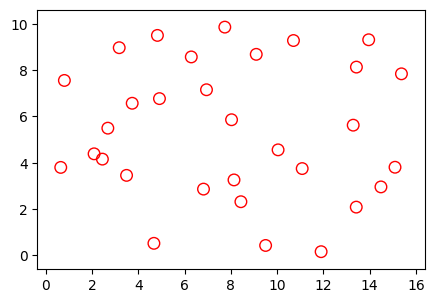

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, [])

In [6]:
# trigger_lazy_computation an initial solution via 2opt
initial_solution = compute_tour_by_2opt(instance).get_trajectory()

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-13


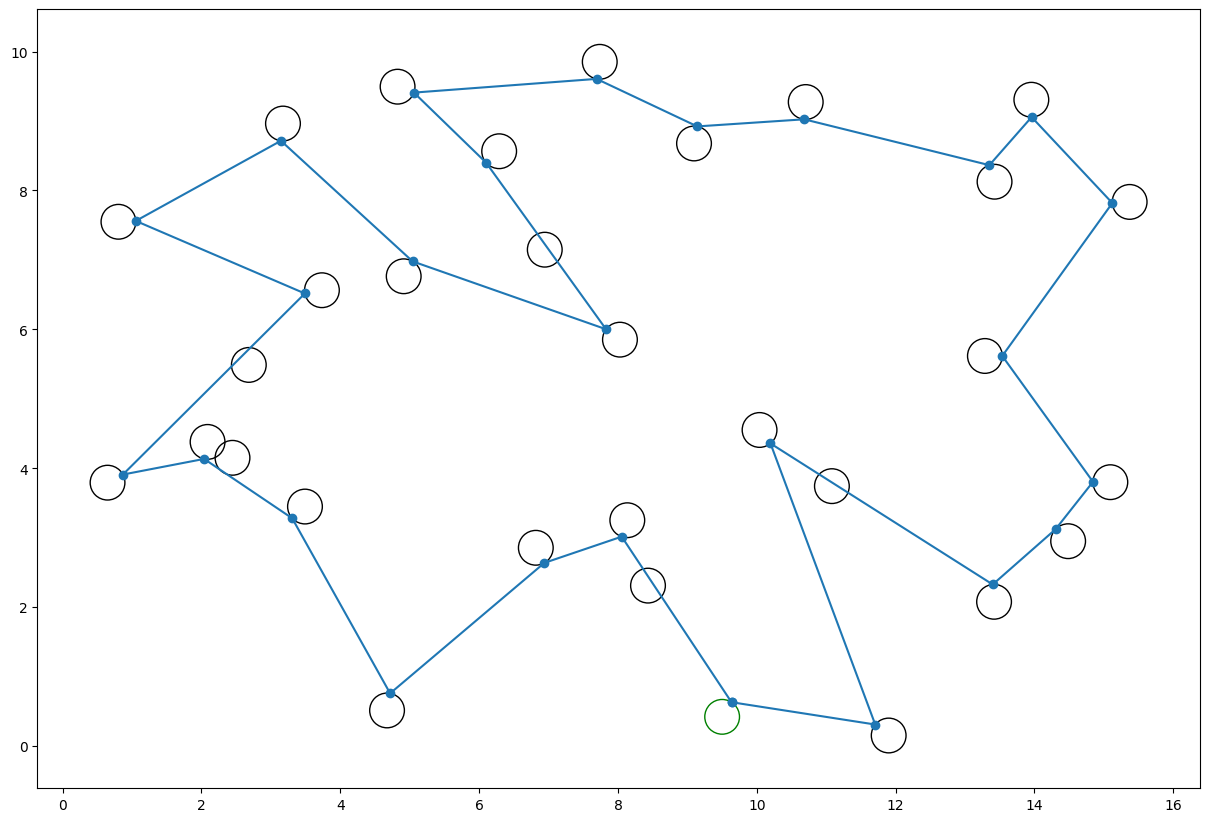

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plot_solution(plt.gca(), instance, initial_solution, highlight=[6])

17 circles  to be  recovered
Using node simplification.
Using ChFarthestCircle-Branching
Using DfsBfs search
Starting with root node of size 1
i	LB	|	UB	|	Time
1	20.0444	|	34.152	|	0.002s
2	21.7924	|	34.152	|	0.003s
3	23.7599	|	34.152	|	0.006s
4	23.8763	|	34.152	|	0.008s
5	23.8763	|	34.152	|	0.009s
6	23.8763	|	34.152	|	0.014s
7	23.8763	|	34.152	|	0.02s
8	23.8763	|	34.152	|	0.022s
9	23.8763	|	34.152	|	0.029s
10	23.8763	|	34.152	|	0.038s
20	26.1844	|	32.5836	|	0.083s
30	27.4107	|	32.5836	|	0.103s
40	27.8169	|	32.5836	|	0.131s
50	28.4968	|	32.5836	|	0.155s
60	29.1049	|	32.5836	|	0.177s
70	29.38	|	32.5836	|	0.204s
80	29.5264	|	32.5836	|	0.237s
90	29.7736	|	32.5836	|	0.264s
100	30.4278	|	32.5836	|	0.292s
---------------
186	32.2612	|	32.5836
186 iterations with 134 nodes explored and 133 branches.
15 circles  to be  recovered
Using node simplification.
Using ChFarthestCircle-Branching
Using DfsBfs search
Starting with root node of size 1
i	LB	|	UB	|	Time
1	21.2965	|	30.1845	|	0.001s
2	23.33

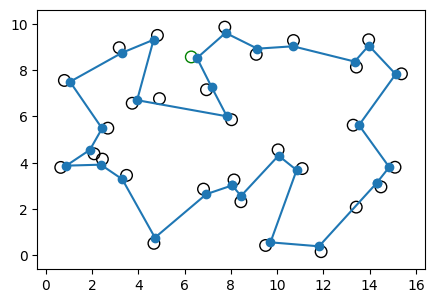

In [8]:
initial_solution = optimize_tour_by_lns(instance, initial_solution, 20, 15);
plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, initial_solution, highlight=[15])

In [9]:
timelimit = 220
node_values = []
def count(event):
    return
    global node_values
    node_values.append(event.current_node.get_relaxed_solution().length())
    ub = event.get_upper_bound()
    lb = event.get_lower_bound()
    depth = event.current_node.depth()

    if not event.current_node.get_relaxed_solution().is_simple():
        plt.figure(figsize=(5, 5))
        plt.title(f"{event.current_node.get_relaxed_solution().length()} vs. {ub}")
        plot_solution(plt.gca(), instance, event.get_relaxed_solution(), highlight=event.current_node.get_fixed_sequence())
        plt.show()
        #event.current_node.prune()
        
opt_solution, lb = branch_and_bound(instance, count, initial_solution, timelimit)

Using node simplification.
Using ChFarthestCircle-Branching
Using DfsBfs search
Starting with root node of size 11
i	LB	|	UB	|	Time
1	42.7978	|	56.8771	|	0.01s
2	44.0427	|	56.8771	|	0.018s
3	44.0427	|	56.8771	|	0.026s
4	44.0427	|	56.8771	|	0.036s
5	44.0427	|	56.8771	|	0.04s
6	44.0427	|	56.8771	|	0.051s
7	44.0427	|	56.8771	|	0.062s
8	44.0427	|	56.8771	|	0.077s
9	44.0427	|	56.8771	|	0.091s
10	44.0427	|	56.8771	|	0.108s
20	44.121	|	56.8771	|	0.223s
30	45.6684	|	56.8771	|	0.305s
40	45.95	|	56.8771	|	0.37s
50	45.95	|	56.8771	|	0.5s
60	46.0835	|	56.8771	|	0.6s
70	46.9554	|	56.8771	|	0.701s
80	47.5825	|	56.8771	|	0.777s
90	48.2401	|	56.8771	|	0.864s
100	48.2541	|	56.8771	|	0.949s
200	49.3756	|	56.8771	|	1.872s
300	50.035	|	56.8771	|	2.86s
400	50.8504	|	56.8771	|	3.731s
500	51.3454	|	56.8771	|	4.646s
600	51.7312	|	56.8771	|	5.551s
700	52.0423	|	56.8771	|	6.445s
800	52.3274	|	56.8771	|	7.354s
900	52.6165	|	56.8771	|	8.97s
1000	52.8735	|	56.8771	|	10.765s
2000	54.3172	|	56.8771	|	22.782s
3000	55

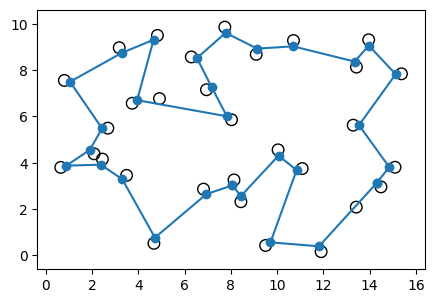

In [10]:
plt.figure(figsize=(5, 5))
plot_solution(plt.gca(), instance, opt_solution)